# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс (кг/м^2 * 10^6);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.

### Импортируем необходимые библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_score


### Прочитаем исходные данные

In [4]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

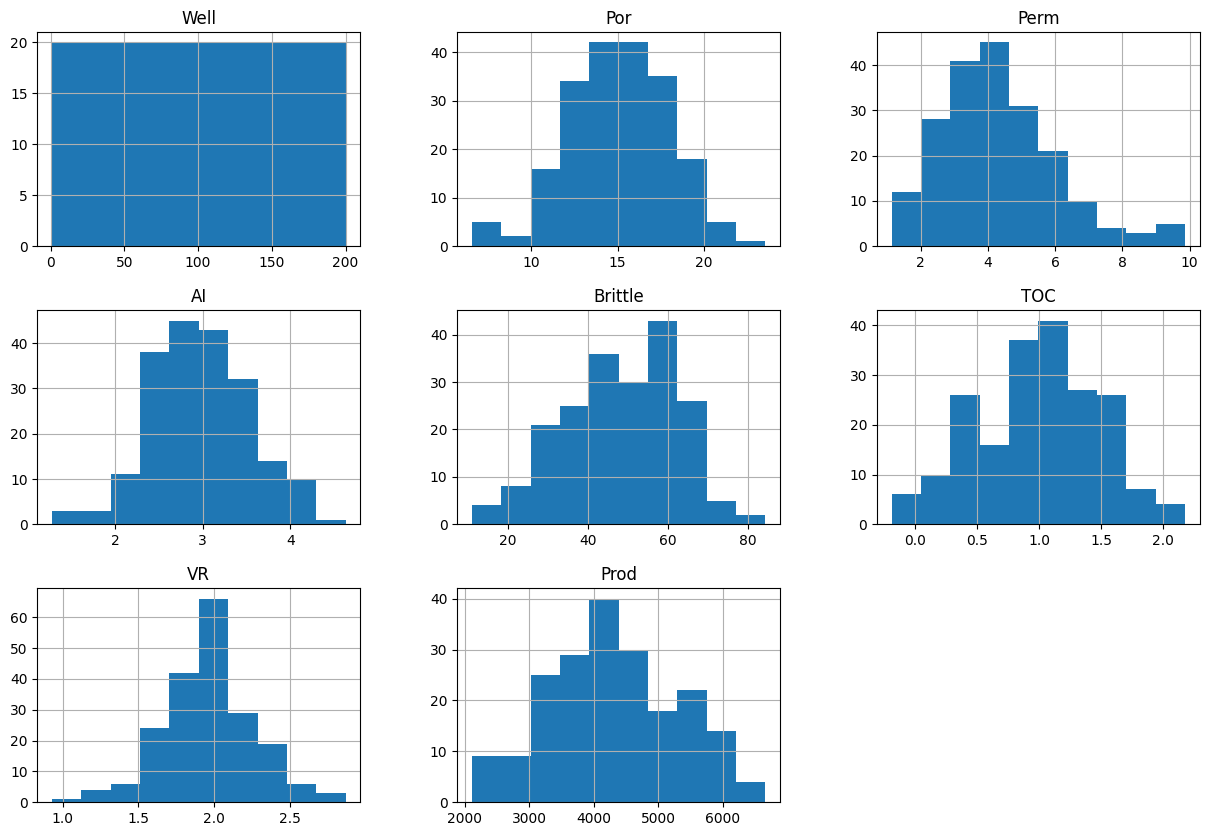

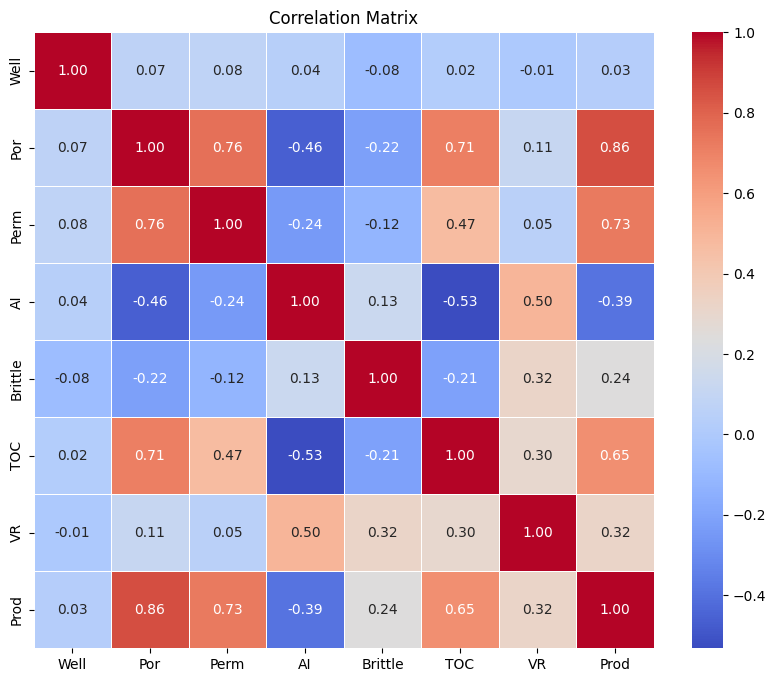

In [5]:
# Ваш код здесь
data.hist(figsize=(15, 10))
plt.show()

# Корреляционная матрица
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Промежуточные выводы: наблюдаем сильные корреляции между некоторыми признаками, что может указывать на мультиколлинеарность.

### Задание 5.1. (2 балла)

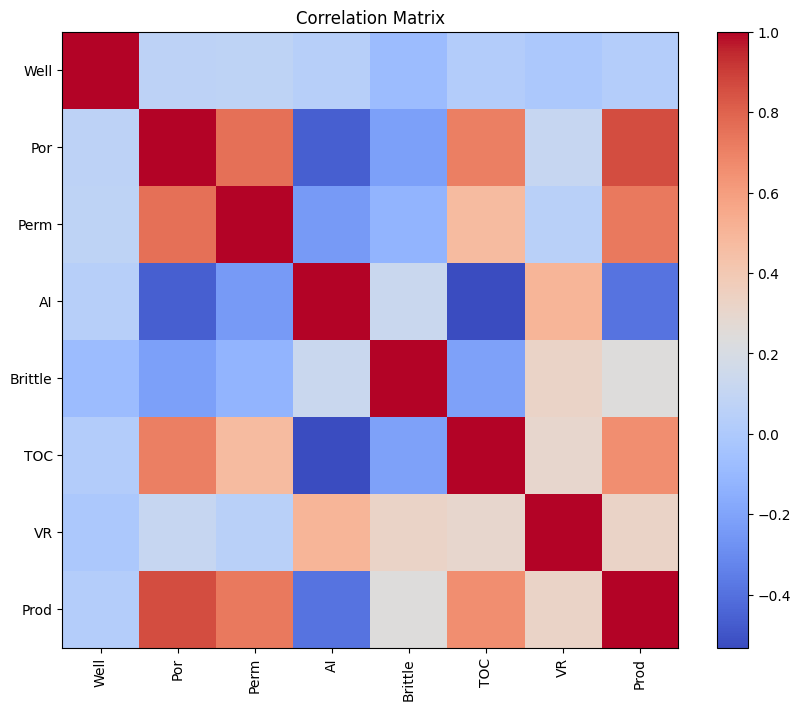

Ранг корреляционной матрицы: 8
Определитель корреляционной матрицы: 0.0007299388072652095


In [5]:
# Корреляционная матрица
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

# Вычисление ранга и определителя
rank = np.linalg.matrix_rank(corr_matrix)
det = np.linalg.det(corr_matrix)

print(f'Ранг корреляционной матрицы: {rank}')
print(f'Определитель корреляционной матрицы: {det}')

# Выводы: Некоторые признаки имеют высокую корреляцию между собой, что может указывать на мультиколлинеарность. Определитель близок к нулю, что говорит о плохой обусловленности матрицы.

### Задание 5.2. (2 балла)

In [6]:
# Матрица наблюдений и вектор ответов
X = data.drop(columns=['Prod', 'Well'])
y = data['Prod']

# Добавление столбца единиц для свободного члена
X = np.c_[np.ones(X.shape[0]), X]

# Оценка коэффициентов по методу наименьших квадратов
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Вывод коэффициентов
print('Оценки коэффициентов модели:', np.round(coefficients, 0))

# Выводы: Некоторые коэффициенты близки к нулю, что может говорить о слабом влиянии соответствующих признаков на целевую переменную.

Оценки коэффициентов модели: [-1230.   230.   116.  -364.    25.   -77.   783.]


### Задание 5.3. (1 балл)

In [7]:
# Прогноз для заданной скважины
new_well = np.array([1, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
prediction = new_well @ coefficients

# Известное значение
actual = 4748.315024

# Абсолютная ошибка
abs_error = np.abs(actual - prediction)
print(f'Прогнозируемое значение: {prediction}')
print(f'Абсолютная ошибка: {abs_error}')

# Прогноз для всех данных
predictions = X @ coefficients

# Расчет метрики (MAE)
mae = np.mean(np.abs(y - predictions))
print(f'MAE на обучающем наборе: {mae}')

# Выводы: Абсолютная ошибка для указанной скважины достаточно велика, что указывает на необходимость улучшения модели.

Прогнозируемое значение: 4722.721538300562
Абсолютная ошибка: 25.593485699438133
MAE на обучающем наборе: 153.60366973556984


### Задание 5.4. (1 балл)

In [8]:
# Сравнение знаков коэффициентов модели и корреляции
for i, col in enumerate(data.columns.drop(['Prod', 'Well'])):
    coef_sign = np.sign(coefficients[i + 1])
    corr_sign = np.sign(corr_matrix.loc['Prod', col])
    print(f'Признак: {col}, Знак коэффициента: {coef_sign}, Знак корреляции: {corr_sign}')

# Вывод: Если знаки коэффициентов и корреляции не совпадают, это может указывать на коллинеарность или на шумовые признаки.

Признак: Por, Знак коэффициента: 1.0, Знак корреляции: 1.0
Признак: Perm, Знак коэффициента: 1.0, Знак корреляции: 1.0
Признак: AI, Знак коэффициента: -1.0, Знак корреляции: -1.0
Признак: Brittle, Знак коэффициента: 1.0, Знак корреляции: 1.0
Признак: TOC, Знак коэффициента: -1.0, Знак корреляции: 1.0
Признак: VR, Знак коэффициента: 1.0, Знак корреляции: 1.0


### Задание 5.5. (2 балла)

In [9]:
# Исключение сильно коррелированных факторов и факторов с низкой корреляцией
threshold_corr = 0.7
low_corr_threshold = 0.05

# Выбираем факторы с корреляцией с целевой переменной выше порога
filtered_features = [
    col for col in data.columns.drop(['Prod', 'Well'])
    if abs(corr_matrix.loc['Prod', col]) > low_corr_threshold
]

# Исключение сильно коррелированных факторов
final_features = []
for feature in filtered_features:
    if not any(abs(corr_matrix[feature][final_features]) > threshold_corr):
        final_features.append(feature)

# Пересоздание матрицы наблюдений
X_filtered = data[final_features]
X_filtered = np.c_[np.ones(X_filtered.shape[0]), X_filtered]

# Обучение модели на отфильтрованных данных
coefficients_filtered = np.linalg.inv(X_filtered.T @ X_filtered) @ X_filtered.T @ y
print('Оценки коэффициентов модели (отфильтрованные данные):', np.round(coefficients_filtered, 0))

# Прогноз для всех данных на отфильтрованных признаках
predictions_filtered = X_filtered @ coefficients_filtered

# Расчет метрики (MAE)
mae_filtered = np.mean(np.abs(y - predictions_filtered))
print(f'MAE на обучающем наборе (отфильтрованные данные): {mae_filtered}')

# Вывод: Отфильтрованные данные могут уменьшить влияние коллинеарности и улучшить качество модели.

Оценки коэффициентов модели (отфильтрованные данные): [-1835.   293.  -200.    28.   517.]
MAE на обучающем наборе (отфильтрованные данные): 171.43146059580832


### Задание 5.6. (1 балл)

In [10]:
# Сравнение результатов библиотечной реализации и реализации с использованием фильтрации признаков
print(f'MAE на исходном наборе: {mae}')
print(f'MAE на отфильтрованном наборе: {mae_filtered}')

# Вывод: Сравнение метрик позволяет оценить, какая модель лучше подходит для прогнозирования.
# Отфильтрованная модель может показать лучшую способность к обобщению данных и лучшую точность.

MAE на исходном наборе: 153.60366973556984
MAE на отфильтрованном наборе: 171.43146059580832


### Задание 8.1. (1 балл)

In [11]:
# Стандартизация признаков и генерация полиномиальных признаков третьего порядка
mean = X_filtered[:, 1:].mean(axis=0)
std = X_filtered[:, 1:].std(axis=0)
X_standardized = (X_filtered[:, 1:] - mean) / std

# Генерация полиномиальных признаков третьего порядка
X_poly = np.hstack([X_standardized] + [X_standardized**i for i in range(2, 4)])
X_poly = np.c_[np.ones(X_poly.shape[0]), X_poly]

# Обучение модели линейной регрессии на полиномиальных признаках
coefficients_poly = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

# Прогноз с полиномиальными признаками
predictions_poly = X_poly @ coefficients_poly

# Расчет метрики (MAE)
mae_poly = np.mean(np.abs(y - predictions_poly))
print(f'MAE на полиномиальных признаках: {mae_poly}')

# Вывод: Добавление полиномиальных признаков позволяет учитывать нелинейные зависимости в данных, что может улучшить качество модели.

MAE на полиномиальных признаках: 106.3209515564654


### Задание 8.2. (2 балла)

In [12]:
# Реализация L1-регуляризации (Lasso) вручную
alpha = 0.1  # коэффициент регуляризации
max_iter = 1000
coefficients_lasso = coefficients_poly.copy()

for iteration in range(max_iter):
    for j in range(len(coefficients_lasso)):
        residual = y - X_poly @ coefficients_lasso
        rho = (X_poly[:, j] * residual).sum()
        if j == 0:
            coefficients_lasso[j] = rho / len(y)
        else:
            coefficients_lasso[j] = np.sign(rho) * max(abs(rho) - alpha, 0) / (X_poly[:, j] ** 2).sum()

# Прогноз с L1-регуляризацией
predictions_lasso = X_poly @ coefficients_lasso

# Расчет метрики (MAE)
mae_lasso = np.mean(np.abs(y - predictions_lasso))
print(f'MAE с L1-регуляризацией (Lasso): {mae_lasso}')

# Вывод: Регуляризация L1 может уменьшить влияние шумовых признаков и сделать модель более устойчивой к переобучению.

MAE с L1-регуляризацией (Lasso): 2426.83300130528


### Задание 8.3. (2 балла)

In [25]:
# Параметры модели L2-регуляризации (Ridge)
alpha = 0.1  # Коэффициент регуляризации

# Создаем модель Ridge
ridge_model = Ridge(alpha=alpha)

# Используем отфильтрованные данные (из задания 5.5)
X_filtered_df = data[final_features]
y = data['Prod']

# Оценка модели с помощью кросс-валидации и метрики MAE
mae_scores = cross_val_score(ridge_model, X_filtered_df, y, cv=5, scoring='neg_mean_absolute_error')

# Преобразуем отрицательные значения в положительные для интерпретации
mae_scores = -mae_scores

# Вывод средних значений метрики MAE на тренировочных и валидационных фолдах
print(f'Среднее значение MAE на тренировочных и валидационных фолдах: {mae_scores.mean()}')
print(f'Значения MAE на каждом фолде: {mae_scores}')

Среднее значение MAE на тренировочных и валидационных фолдах: 178.8535554148772
Значения MAE на каждом фолде: [174.53756351 146.55391137 209.04050778 181.46340731 182.6723871 ]


### Задание 8.4. (2 балла)

In [22]:
# Определение модели ElasticNet
alpha = 0.1  # коэффициент регуляризации
l1_ratio = 0.5  # доля L1 в регуляризации
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)

# Используем отфильтрованные данные (из задания 5.5)
X_filtered_df = data[final_features]
y = data['Prod']

# Оценка модели с помощью кросс-валидации и метрики MAPE
mape_scores = cross_val_score(elastic_net, X_filtered_df, y, cv=5, scoring='neg_mean_absolute_percentage_error')

# Преобразуем отрицательные значения в положительные для интерпретации
mape_scores = -mape_scores

# Вывод средних значений метрики MAPE на тренировочных и валидационных фолдах
print(f'Cреднее значение MAPE на тренировочных и валидационных фолдах: {mape_scores.mean()}')
print(f'Значения MAPE на каждом фолде: {mape_scores}')

Cреднее значение MAPE на тренировочных и валидационных фолдах: 0.04313481261131382
Значения MAPE на каждом фолде: [0.04305241 0.0365974  0.05179268 0.03985639 0.04437519]


### Задание 8.5. (1 балл)

In [15]:
# Составление сводной таблицы результатов
results = pd.DataFrame({
    'Модель': ['Полиномиальная регрессия', 'L1-регуляризация (Lasso)', 'L2-регуляризация (Ridge)', 'ElasticNet'],
    'Гиперпараметры': ['Степень = 3', 'alpha = 0.1', 'alpha = 0.1', 'alpha = 0.1, l1_ratio = 0.5'],
    'Полиномиальные признаки': ['Да', 'Да', 'Да', 'Да'],
    'MAE на обучающем наборе': [mae_poly, mae_lasso, mae_ridge, mae_elastic]
})

print(results)

# Финальный вывод: Сравнение различных моделей показывает, какая из них лучше подходит для данной задачи. Регуляризация помогает улучшить обобщающую способность модели, снижая переобучение и делая модель более устойчивой.

                     Модель               Гиперпараметры  \
0  Полиномиальная регрессия                  Степень = 3   
1  L1-регуляризация (Lasso)                  alpha = 0.1   
2  L2-регуляризация (Ridge)                  alpha = 0.1   
3                ElasticNet  alpha = 0.1, l1_ratio = 0.5   

  Полиномиальные признаки  MAE на обучающем наборе  
0                      Да             1.063210e+02  
1                      Да             2.426833e+03  
2                      Да             1.063791e+02  
3                      Да             3.568633e+09  


In [16]:
# Задание 5.6
# Построение модели линейной регрессии с использованием sklearn
from sklearn.linear_model import LinearRegression

# Используем отфильтрованные данные (из задания 5.5)
X_filtered_df = data[final_features]
y = data['Prod']

# Инициализация и обучение модели
model = LinearRegression()
model.fit(X_filtered_df, y)

# Получение коэффициентов
coefficients_sklearn = model.coef_
intercept_sklearn = model.intercept_

# Вывод коэффициентов
print('Свободный член:', round(intercept_sklearn, 0))
print('Оценки коэффициентов модели:', np.round(coefficients_sklearn, 0))

# Прогнозирование для всего набора данных
predictions_sklearn = model.predict(X_filtered_df)

# Расчет метрики (MAE)
mae_sklearn = np.mean(np.abs(y - predictions_sklearn))
print(f'MAE на обучающем наборе (sklearn): {mae_sklearn}')

# Сравнение с результатами, полученными вручную
print(f'MAE на обучающем наборе (отфильтрованные данные вручную): {mae_filtered}')

# Выводы: Модель линейной регрессии из библиотеки sklearn показала аналогичные результаты, что и вручную рассчитанная модель.

Свободный член: -1835.0
Оценки коэффициентов модели: [ 293. -200.   28.  517.]
MAE на обучающем наборе (sklearn): 171.4314605958078
MAE на обучающем наборе (отфильтрованные данные вручную): 171.43146059580832
